### Importing necessary libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torchsummary import summary

# Let's visualize some of the images
#%matplotlib inline
import matplotlib.pyplot as plt
import argparse

from torch.optim.lr_scheduler import StepLR,OneCycleLR

from train import *
from test import *
from model import *
from plotter import *
from data import *
# from model_group_norm import *
# from model_layer_norm import *

#from parser_args import norm, epochs

### Setting up the type of experiment here

In [3]:
norm='bn'
epochs=25

### Setting up the device and dataloaders

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)



# train dataloader
train_loader = load_train()

# test dataloader
test_loader = load_test()

CUDA Available? True


### Getting the model summary

In [5]:
# Printing the summary of the model
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Using: ",device)

if norm == 'bn':
	print("Loading Batchnorm Model")
	model = Net().to(device)
elif norm == 'group':
	print("Loading Group Model")
	model = Net_group_norm().to(device)

elif norm == 'layer':
	print("Loading layer Model")
	model = Net_layer_norm().to(device)

#model = Net().to(device)
#model = Net_group_norm().to(device)
#model = Net_layer_norm().to(device)

model.apply(weights_init)
summary(model, input_size=(1, 28, 28))


Using:  cuda
Loading Batchnorm Model
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 10, 10, 10]             720
             ReLU-12           [-1, 10, 10, 10]               0
      BatchNorm2d-13           [-1, 10, 10, 10]              20
  

### Running the experiment

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = OneCycleLR(optimizer, max_lr=0.020,epochs=epochs,steps_per_epoch=len(train_loader))


for epoch in range(epochs):
    print("EPOCH:", epoch+1)
    bn_train_losses, bn_train_acc = train(model, device, train_loader, optimizer, epoch)
    bn_test_losses, bn_test_acc, bn_false_predictions = test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 1


Loss=5.876650810241699 Batch_id=468 Accuracy=54.78: 100%|██████████| 469/469 [00:22<00:00, 21.04it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 714
EPOCH: 2


Loss=3.199101448059082 Batch_id=468 Accuracy=88.22: 100%|██████████| 469/469 [00:21<00:00, 22.08it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 574
EPOCH: 3


Loss=2.4194371700286865 Batch_id=468 Accuracy=90.92: 100%|██████████| 469/469 [00:21<00:00, 21.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 462
EPOCH: 4


Loss=2.1352717876434326 Batch_id=468 Accuracy=91.86: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 734
EPOCH: 5


Loss=1.8623918294906616 Batch_id=468 Accuracy=92.28: 100%|██████████| 469/469 [00:21<00:00, 21.47it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 492
EPOCH: 6


Loss=1.7245299816131592 Batch_id=468 Accuracy=92.72: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 526
EPOCH: 7


Loss=1.6867480278015137 Batch_id=468 Accuracy=92.64: 100%|██████████| 469/469 [00:22<00:00, 20.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 512
EPOCH: 8


Loss=1.570754051208496 Batch_id=468 Accuracy=92.63: 100%|██████████| 469/469 [00:22<00:00, 20.95it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 493
EPOCH: 9


Loss=1.433593511581421 Batch_id=468 Accuracy=92.81: 100%|██████████| 469/469 [00:22<00:00, 20.92it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 398
EPOCH: 10


Loss=1.372339129447937 Batch_id=468 Accuracy=92.88: 100%|██████████| 469/469 [00:23<00:00, 20.09it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 1144
EPOCH: 11


Loss=1.4934488534927368 Batch_id=468 Accuracy=92.50: 100%|██████████| 469/469 [00:22<00:00, 20.75it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 556
EPOCH: 12


Loss=1.3490451574325562 Batch_id=468 Accuracy=92.67: 100%|██████████| 469/469 [00:23<00:00, 20.37it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 453
EPOCH: 13


Loss=1.362030267715454 Batch_id=468 Accuracy=92.61: 100%|██████████| 469/469 [00:23<00:00, 19.82it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 598
EPOCH: 14


Loss=1.2829065322875977 Batch_id=468 Accuracy=92.62: 100%|██████████| 469/469 [00:23<00:00, 19.84it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 327
EPOCH: 15


Loss=1.431740164756775 Batch_id=468 Accuracy=92.35: 100%|██████████| 469/469 [00:22<00:00, 20.51it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 480
EPOCH: 16


Loss=1.331829309463501 Batch_id=468 Accuracy=92.40: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 308
EPOCH: 17


  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 548
EPOCH: 18


Loss=1.3514742851257324 Batch_id=468 Accuracy=92.26: 100%|██████████| 469/469 [00:23<00:00, 19.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 588
EPOCH: 19


Loss=1.2576534748077393 Batch_id=468 Accuracy=92.10: 100%|██████████| 469/469 [00:23<00:00, 20.07it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 1508
EPOCH: 20


Loss=1.3604446649551392 Batch_id=468 Accuracy=92.17: 100%|██████████| 469/469 [00:23<00:00, 20.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 552
EPOCH: 21


Loss=1.3656835556030273 Batch_id=468 Accuracy=92.20: 100%|██████████| 469/469 [00:23<00:00, 20.02it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 462
EPOCH: 22


Loss=1.4023277759552002 Batch_id=468 Accuracy=92.15: 100%|██████████| 469/469 [00:22<00:00, 20.85it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 477
EPOCH: 23


Loss=1.4021008014678955 Batch_id=468 Accuracy=92.22: 100%|██████████| 469/469 [00:22<00:00, 20.64it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 784
EPOCH: 24


Loss=1.3056292533874512 Batch_id=468 Accuracy=92.24: 100%|██████████| 469/469 [00:23<00:00, 19.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 424
EPOCH: 25


Loss=1.4901384115219116 Batch_id=468 Accuracy=92.04: 100%|██████████| 469/469 [00:22<00:00, 20.71it/s]


Total false predictions are 468


In [7]:
import matplotlib.pyplot as plt

def plot_py(train_losses, train_acc, test_losses, test_acc, exp_name):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")
    fig.suptitle(exp_name)

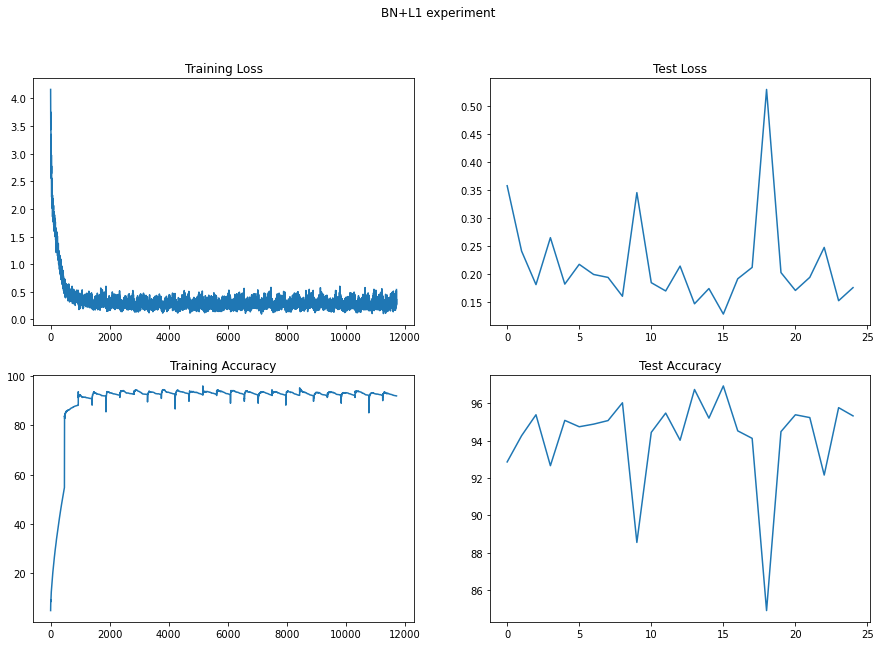

In [8]:
plot_py(bn_train_losses,bn_train_acc,bn_test_losses, bn_test_acc, 'BN+L1 experiment'   )

In [9]:
def false_plotter(false_predictions, exp_name):
    fig = plt.figure(figsize=(8,10))
    fig.tight_layout()
    for i, (img, pred, correct) in enumerate(false_predictions[:10]):
        img, pred, target = img.cpu().numpy(), pred.cpu(), correct.cpu()
        ax = fig.add_subplot(5, 2, i+1)
        ax.axis('off')
        ax.set_title(f'\nactual {target.item()}\npredicted {pred.item()}',fontsize=10)  
        ax.imshow(img.squeeze(), cmap='gray_r')
        fig.suptitle(exp_name+'_experiment')

    plt.show()

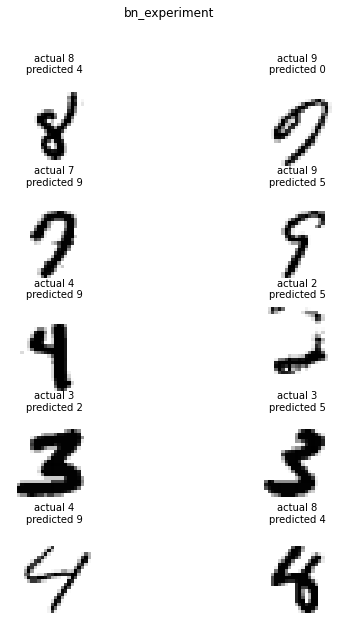

In [10]:
false_plotter(bn_false_predictions, norm)

# Group Normalization Experiment

### Setting up the type of experiment here

In [11]:
norm='group'
epochs=25

### Setting up the device and dataloaders

In [12]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)



# train dataloader
train_loader = load_train()

# test dataloader
test_loader = load_test()

CUDA Available? True


### Getting the model summary

In [13]:
# Printing the summary of the model
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Using: ",device)

if norm == 'bn':
	print("Loading Batchnorm Model")
	model = Net().to(device)
elif norm == 'group':
	print("Loading Group Model")
	model = Net_group_norm().to(device)

elif norm == 'layer':
	print("Loading layer Model")
	model = Net_layer_norm().to(device)

#model = Net().to(device)
#model = Net_group_norm().to(device)
#model = Net_layer_norm().to(device)

model.apply(weights_init)
summary(model, input_size=(1, 28, 28))


Using:  cuda
Loading Group Model
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 10, 10, 10]             720
             ReLU-12           [-1, 10, 10, 10]               0
        GroupNorm-13           [-1, 10, 10, 10]              20
      

### Running the experiment

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = OneCycleLR(optimizer, max_lr=0.020,epochs=epochs,steps_per_epoch=len(train_loader))


for epoch in range(epochs):
    print("EPOCH:", epoch+1)
    group_train_losses, group_train_acc = train(model, device, train_loader, optimizer, epoch)
    group_test_losses, group_test_acc, group_false_predictions = test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 1


Loss=7.397749900817871 Batch_id=468 Accuracy=15.76: 100%|██████████| 469/469 [00:24<00:00, 18.88it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 7408
EPOCH: 2


Loss=4.788220405578613 Batch_id=468 Accuracy=36.89: 100%|██████████| 469/469 [00:23<00:00, 20.05it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 4958
EPOCH: 3


Loss=3.4838109016418457 Batch_id=468 Accuracy=57.95: 100%|██████████| 469/469 [00:24<00:00, 18.81it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 2919
EPOCH: 4


Loss=3.16200852394104 Batch_id=468 Accuracy=69.11: 100%|██████████| 469/469 [00:23<00:00, 20.15it/s]  
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 2471
EPOCH: 5


Loss=2.682546615600586 Batch_id=468 Accuracy=78.46: 100%|██████████| 469/469 [00:23<00:00, 19.99it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 1555
EPOCH: 6


Loss=2.174598217010498 Batch_id=468 Accuracy=83.42: 100%|██████████| 469/469 [00:24<00:00, 19.07it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 1137
EPOCH: 7


Loss=2.1421875953674316 Batch_id=468 Accuracy=86.83: 100%|██████████| 469/469 [00:24<00:00, 19.08it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 549
EPOCH: 8


Loss=2.078829288482666 Batch_id=468 Accuracy=87.61: 100%|██████████| 469/469 [00:22<00:00, 20.49it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 969
EPOCH: 9


Loss=1.7472118139266968 Batch_id=468 Accuracy=88.30: 100%|██████████| 469/469 [00:23<00:00, 19.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 548
EPOCH: 10


Loss=1.5897839069366455 Batch_id=468 Accuracy=89.05: 100%|██████████| 469/469 [00:23<00:00, 19.91it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 857
EPOCH: 11


Loss=1.8124451637268066 Batch_id=468 Accuracy=89.30: 100%|██████████| 469/469 [00:23<00:00, 19.98it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 871
EPOCH: 12


Loss=1.8938064575195312 Batch_id=468 Accuracy=89.08: 100%|██████████| 469/469 [00:23<00:00, 20.03it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 985
EPOCH: 13


Loss=1.6897668838500977 Batch_id=468 Accuracy=89.24: 100%|██████████| 469/469 [00:23<00:00, 20.00it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 959
EPOCH: 14


Loss=1.5709316730499268 Batch_id=468 Accuracy=89.31: 100%|██████████| 469/469 [00:23<00:00, 19.65it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 661
EPOCH: 15


Loss=1.5715879201889038 Batch_id=468 Accuracy=89.58: 100%|██████████| 469/469 [00:24<00:00, 19.17it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 574
EPOCH: 16


Loss=1.7659721374511719 Batch_id=468 Accuracy=89.50: 100%|██████████| 469/469 [00:22<00:00, 20.50it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 431
EPOCH: 17


Loss=1.523522973060608 Batch_id=468 Accuracy=89.84: 100%|██████████| 469/469 [00:23<00:00, 20.00it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 575
EPOCH: 18


Loss=1.6996314525604248 Batch_id=468 Accuracy=89.56: 100%|██████████| 469/469 [00:23<00:00, 19.90it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 801
EPOCH: 19


Loss=1.6840777397155762 Batch_id=468 Accuracy=89.26: 100%|██████████| 469/469 [00:23<00:00, 20.01it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 606
EPOCH: 20


Loss=1.555957555770874 Batch_id=468 Accuracy=89.96: 100%|██████████| 469/469 [00:24<00:00, 19.51it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 528
EPOCH: 21


Loss=1.680997610092163 Batch_id=468 Accuracy=89.53: 100%|██████████| 469/469 [00:23<00:00, 19.82it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 978
EPOCH: 22


Loss=1.5971726179122925 Batch_id=468 Accuracy=89.83: 100%|██████████| 469/469 [00:23<00:00, 19.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 487
EPOCH: 23


Loss=1.6765327453613281 Batch_id=468 Accuracy=89.32: 100%|██████████| 469/469 [00:23<00:00, 19.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 664
EPOCH: 24


Loss=1.7116502523422241 Batch_id=468 Accuracy=89.75: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 458
EPOCH: 25


Loss=1.6836103200912476 Batch_id=468 Accuracy=89.22: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]


Total false predictions are 596


In [15]:
import matplotlib.pyplot as plt

def plot_py(train_losses, train_acc, test_losses, test_acc, exp_name):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")
    fig.suptitle(exp_name)

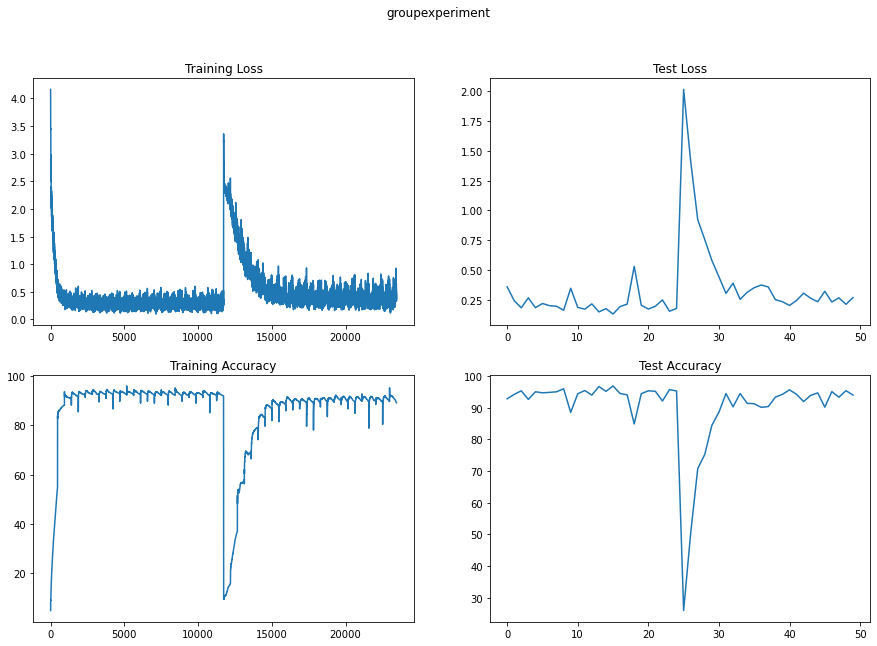

In [16]:
plot_py(group_train_losses,group_train_acc,group_test_losses, group_test_acc, norm+'experiment')

In [17]:
def false_plotter(false_predictions, exp_name):
    fig = plt.figure(figsize=(8,10))
    fig.tight_layout()
    for i, (img, pred, correct) in enumerate(false_predictions[:10]):
        img, pred, target = img.cpu().numpy(), pred.cpu(), correct.cpu()
        ax = fig.add_subplot(5, 2, i+1)
        ax.axis('off')
        ax.set_title(f'\nactual {target.item()}\npredicted {pred.item()}',fontsize=10)  
        ax.imshow(img.squeeze(), cmap='gray_r')
        fig.suptitle(exp_name+'_experiment')

    plt.show()

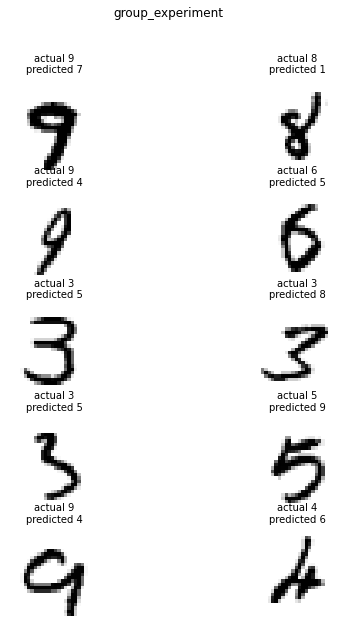

In [18]:
false_plotter(group_false_predictions, norm)

# Layer Normalization experiment

### Setting up the type of experiment here

In [21]:
norm='layer'
epochs=20

### Setting up the device and dataloaders

In [22]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)



# train dataloader
train_loader = load_train()

# test dataloader
test_loader = load_test()

CUDA Available? True


### Getting the model summary

In [23]:
# Printing the summary of the model
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Using: ",device)

if norm == 'bn':
	print("Loading Batchnorm Model")
	model = Net().to(device)
elif norm == 'group':
	print("Loading Group Model")
	model = Net_group_norm().to(device)

elif norm == 'layer':
	print("Loading layer Model")
	model = Net_layer_norm().to(device)

#model = Net().to(device)
#model = Net_group_norm().to(device)
#model = Net_layer_norm().to(device)

model.apply(weights_init)
summary(model, input_size=(1, 28, 28))


Using:  cuda
Loading layer Model
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 10, 10, 10]             720
             ReLU-12           [-1, 10, 10, 10]               0
        GroupNorm-13           [-1, 10, 10, 10]              20
      

### Running the experiment

In [24]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = OneCycleLR(optimizer, max_lr=0.020,epochs=epochs,steps_per_epoch=len(train_loader))

for epoch in range(epochs):
    print("EPOCH:", epoch+1)
    layer_train_losses, layer_train_acc = train(model, device, train_loader, optimizer, epoch)
    layer_test_losses, layer_test_acc, layer_false_predictions = test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

EPOCH: 1


Loss=5.882213592529297 Batch_id=468 Accuracy=49.07: 100%|██████████| 469/469 [00:23<00:00, 19.55it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 767
EPOCH: 2


Loss=3.242309093475342 Batch_id=468 Accuracy=88.22: 100%|██████████| 469/469 [00:23<00:00, 19.71it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 442
EPOCH: 3


Loss=2.5715689659118652 Batch_id=468 Accuracy=91.01: 100%|██████████| 469/469 [00:26<00:00, 17.38it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 665
EPOCH: 4


Loss=2.2198967933654785 Batch_id=468 Accuracy=91.86: 100%|██████████| 469/469 [00:23<00:00, 20.28it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 519
EPOCH: 5


Loss=1.9475533962249756 Batch_id=468 Accuracy=91.81: 100%|██████████| 469/469 [00:23<00:00, 19.93it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 495
EPOCH: 6


Loss=1.7679344415664673 Batch_id=468 Accuracy=91.75: 100%|██████████| 469/469 [00:22<00:00, 20.42it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 554
EPOCH: 7


Loss=2.020364284515381 Batch_id=468 Accuracy=91.67: 100%|██████████| 469/469 [00:22<00:00, 20.52it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 801
EPOCH: 8


Loss=1.461279034614563 Batch_id=468 Accuracy=92.10: 100%|██████████| 469/469 [00:23<00:00, 20.08it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 361
EPOCH: 9


Loss=1.5340604782104492 Batch_id=468 Accuracy=91.88: 100%|██████████| 469/469 [00:22<00:00, 20.45it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 588
EPOCH: 10


Loss=1.266560435295105 Batch_id=468 Accuracy=91.53: 100%|██████████| 469/469 [00:23<00:00, 19.78it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 663
EPOCH: 11


Loss=1.4887850284576416 Batch_id=468 Accuracy=91.19: 100%|██████████| 469/469 [00:23<00:00, 19.92it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 553
EPOCH: 12


Loss=1.4129550457000732 Batch_id=468 Accuracy=91.69: 100%|██████████| 469/469 [00:23<00:00, 19.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 606
EPOCH: 13


Loss=1.3209733963012695 Batch_id=468 Accuracy=91.27: 100%|██████████| 469/469 [00:23<00:00, 19.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 305
EPOCH: 14


Loss=1.5685062408447266 Batch_id=468 Accuracy=90.45: 100%|██████████| 469/469 [00:23<00:00, 19.59it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 499
EPOCH: 15


Loss=1.370877981185913 Batch_id=468 Accuracy=91.61: 100%|██████████| 469/469 [00:23<00:00, 20.36it/s] 
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 588
EPOCH: 16


Loss=1.5733957290649414 Batch_id=468 Accuracy=90.81: 100%|██████████| 469/469 [00:22<00:00, 20.66it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 443
EPOCH: 17


Loss=1.7096483707427979 Batch_id=468 Accuracy=91.12: 100%|██████████| 469/469 [00:23<00:00, 20.29it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 655
EPOCH: 18


Loss=1.3641154766082764 Batch_id=468 Accuracy=90.69: 100%|██████████| 469/469 [00:23<00:00, 19.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 512
EPOCH: 19


Loss=1.2752432823181152 Batch_id=468 Accuracy=90.85: 100%|██████████| 469/469 [00:24<00:00, 19.54it/s]
  0%|          | 0/469 [00:00<?, ?it/s]

Total false predictions are 577
EPOCH: 20


Loss=1.7159974575042725 Batch_id=468 Accuracy=90.83: 100%|██████████| 469/469 [00:24<00:00, 19.16it/s]


Total false predictions are 707


In [31]:
import matplotlib.pyplot as plt

def plot_py(train_losses, train_acc, test_losses, test_acc, exp_name):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(train_losses)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].plot(train_acc)
    axs[1, 0].set_title("Training Accuracy")
    axs[0, 1].plot(test_losses)
    axs[0, 1].set_title("Test Loss")
    axs[1, 1].plot(test_acc)
    axs[1, 1].set_title("Test Accuracy")
    fig.suptitle(exp_name)

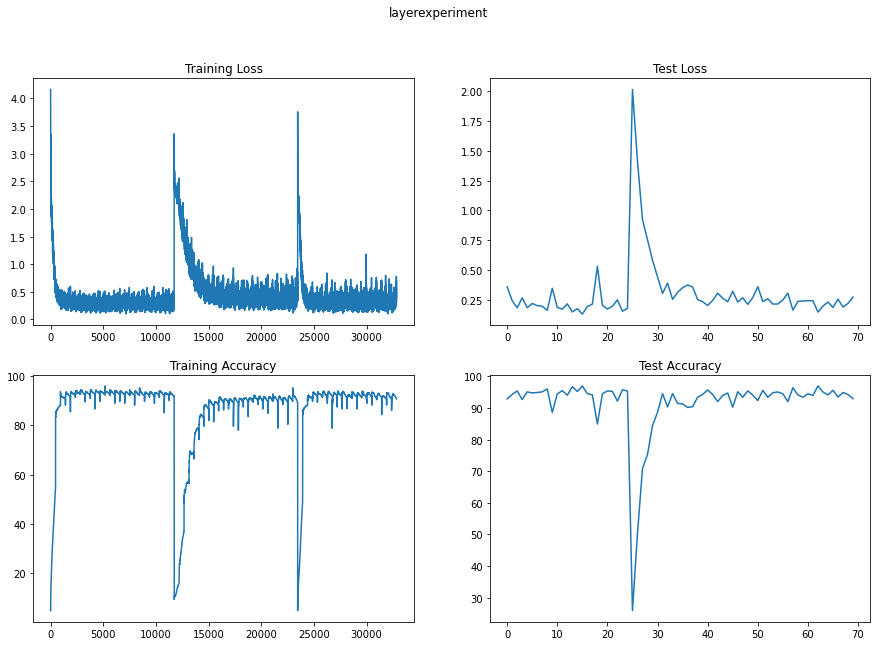

In [32]:
plot_py(layer_train_losses,layer_train_acc,layer_test_losses, layer_test_acc, norm+'experiment')

In [33]:
def false_plotter(false_predictions, exp_name):
    fig = plt.figure(figsize=(8,10))
    fig.tight_layout()
    for i, (img, pred, correct) in enumerate(false_predictions[:10]):
        img, pred, target = img.cpu().numpy(), pred.cpu(), correct.cpu()
        ax = fig.add_subplot(5, 2, i+1)
        ax.axis('off')
        ax.set_title(f'\nactual {target.item()}\npredicted {pred.item()}',fontsize=10)  
        ax.imshow(img.squeeze(), cmap='gray_r')
        fig.suptitle(exp_name+'_experiment')

    plt.show()

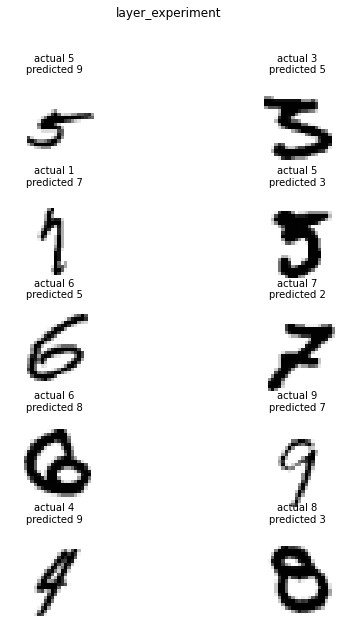

In [34]:
false_plotter(layer_false_predictions, norm)

# Graph 1: Test/Validation Loss for all 3 models together

In [37]:
import matplotlib.pyplot as plt

exp_names=['bn','group','layer']

def plot_py(bn_test_losses,group_train_losses, layer_train_losses):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(bn_test_losses)
    axs[0, 0].set_title("BN Training Loss")
    axs[1, 0].plot(group_train_losses)
    axs[1, 0].set_title("Group Training Loss")
    axs[0, 1].plot(layer_train_losses)
    axs[0, 1].set_title("Layer Training Loss")
    fig.suptitle('Graph 1: Test/Validation Loss for all 3 models together')
    plt.savefig("Graph1_Test_Loss.jpg")

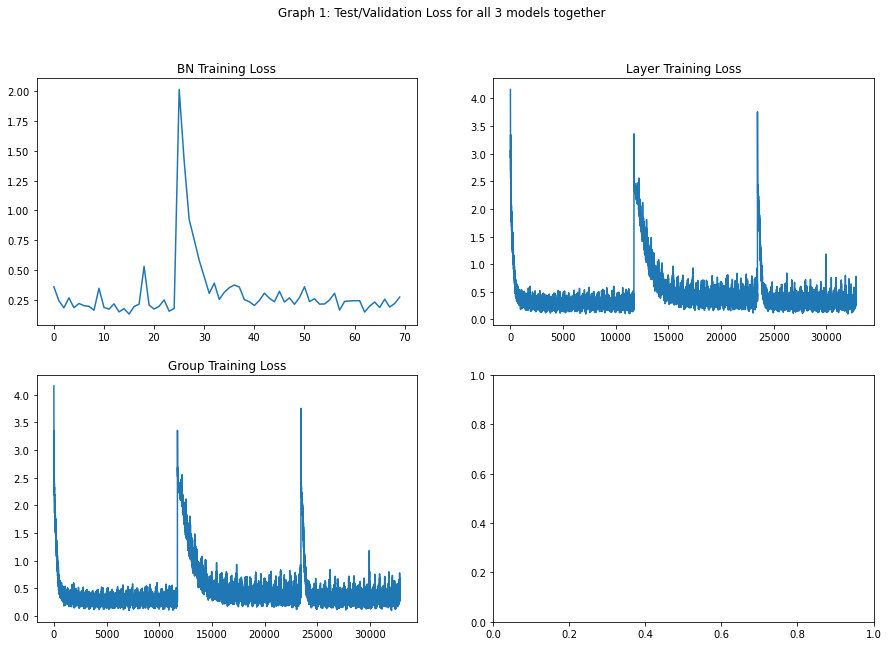

In [38]:
plot_py(bn_test_losses,group_train_losses, layer_train_losses)

# Graph 2: Test/Validation Accuracy for 3 models together

In [39]:
import matplotlib.pyplot as plt

exp_names=['bn','group','layer']

def plot_py(bn_test_acc,group_train_acc, layer_train_acc):
    fig, axs = plt.subplots(2,2,figsize=(15,10))
    axs[0, 0].plot(bn_test_acc)
    axs[0, 0].set_title("BN Training Accuracy")
    axs[1, 0].plot(group_train_acc)
    axs[1, 0].set_title("Group Training Accuracy")
    axs[0, 1].plot(layer_train_acc)
    axs[0, 1].set_title("Layer Training Accuracy")
    fig.suptitle('Graph 2: Test/Validation Accuracy for 3 models together')
    plt.savefig('Graph2_Test_Accuracy.jpg')

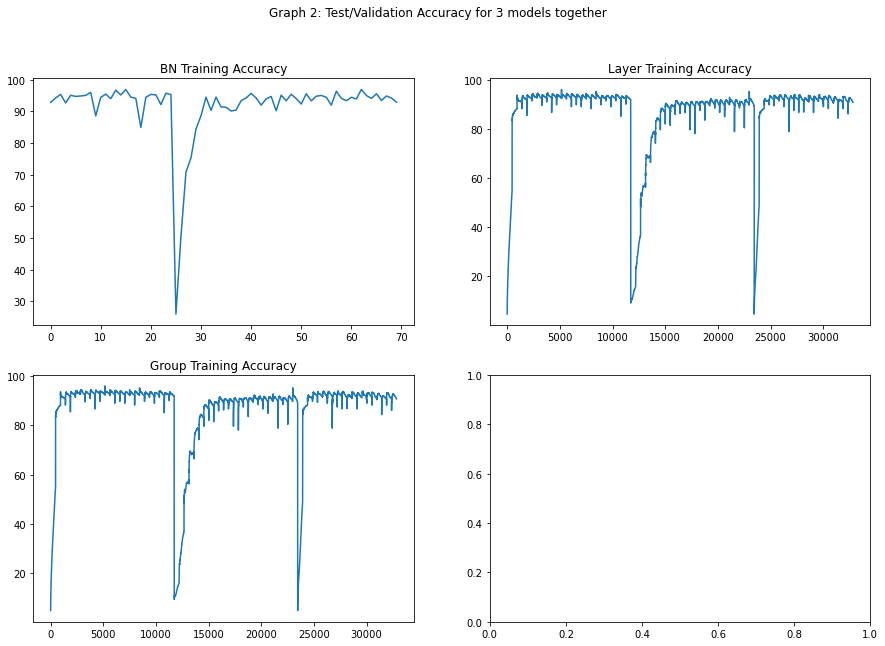

In [40]:
plot_py(bn_test_acc,group_train_acc, layer_train_acc)

# Collection of misclassified images for each model

In [41]:
def false_plotter(false_predictions, exp_name):
    fig = plt.figure(figsize=(8,10))
    fig.tight_layout()
    for i, (img, pred, correct) in enumerate(false_predictions[:10]):
        img, pred, target = img.cpu().numpy(), pred.cpu(), correct.cpu()
        ax = fig.add_subplot(5, 2, i+1)
        ax.axis('off')
        ax.set_title(f'\nactual {target.item()}\npredicted {pred.item()}',fontsize=10)  
        ax.imshow(img.squeeze(), cmap='gray_r')
        fig.suptitle(exp_name+'_experiment')
        plt.savefig(exp_name+"_experiment_misclassified_images.jpg")

    plt.show()

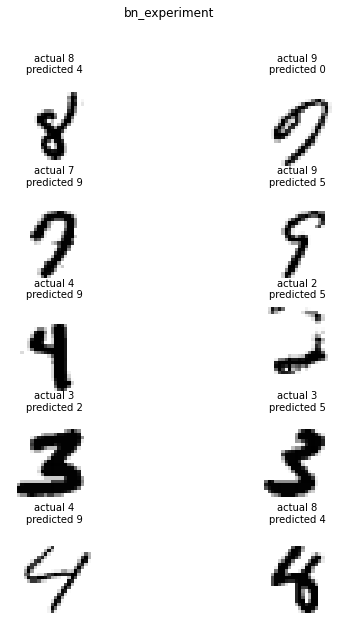

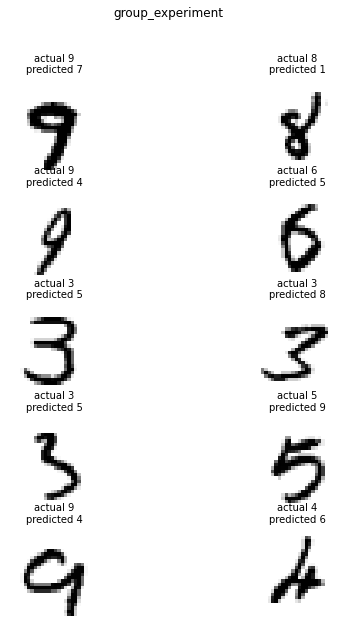

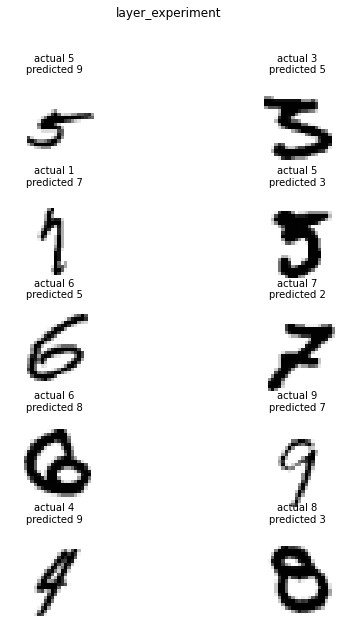

In [42]:
for i in exp_names:
    if i == 'bn':
        false_plotter(bn_false_predictions, i)
    elif i == 'group':
        false_plotter(group_false_predictions, i)
    elif i == 'layer':
        false_plotter(layer_false_predictions, i)